In [1]:
# To get the blocks associated with the North Atlantic region for each model,
# so we can speed up looking at just this region

In [2]:
import os
import netCDF4
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
%matplotlib inline

datadir = '/data/mmenary/fgco2/'

models = ['GISS-E2-1-G', 'GISS-E2-1-G-CC', 'CMCC-ESM2', 'NorESM2-LM', 'CESM2-WACCM',
          'CESM2-WACCM-FV2', 'CESM2-FV2', 'CNRM-ESM2-1', 'UKESM1-0-LL', 'EC-Earth3-CC',
          'CESM2', 'IPSLCM6A']

block_len = 30

def get_ji_for_block(block_number, block_len):   
    nblocks_j = np.int(np.ceil(nj / np.float(block_len)))
    nblocks_i = np.int(np.ceil(ni / np.float(block_len)))

    block_j = np.int(block_number // nblocks_i)
    block_i = np.int(block_number - (block_j * nblocks_i))

    j0 = block_j * block_len
    i0 = block_i * block_len
    j1 = np.min((((block_j + 1) * block_len), nj))
    i1 = np.min((((block_i + 1) * block_len), ni))
    
    return [j0, j1, i0, i1]

GISS-E2-1-G (180, 360) -179.0 180.0
GISS-E2-1-G-CC (180, 360) -179.0 180.0
CMCC-ESM2 (292, 362) -179.9965362548828 179.9903106689453
NorESM2-LM (385, 360) -179.9967955192592 179.9889159673213
CESM2-WACCM (384, 320) -179.99673455712585 179.99924679439192
CESM2-WACCM-FV2 (384, 320) -179.99673455712585 179.99924679439192
CESM2-FV2 (384, 320) -179.99673455712585 179.99924679439192
CNRM-ESM2-1 (294, 362) -179.9965362548828 179.9903106689453
UKESM1-0-LL (330, 360) -179.99654 179.99031
EC-Earth3-CC (292, 362) -179.9965362548828 179.9903106689453
CESM2 (384, 320) -179.99673455712585 179.99924679439192
IPSLCM6A (332, 362) -179.99654 179.99031


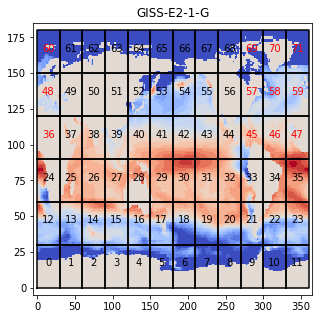

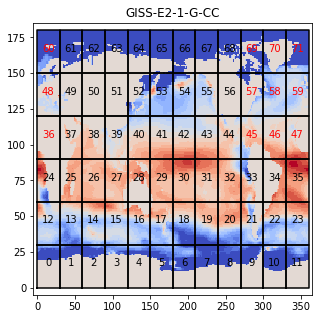

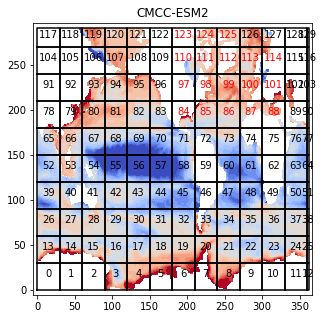

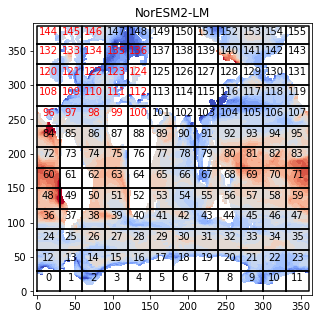

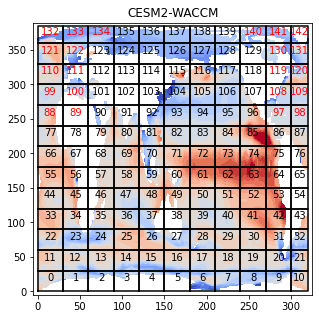

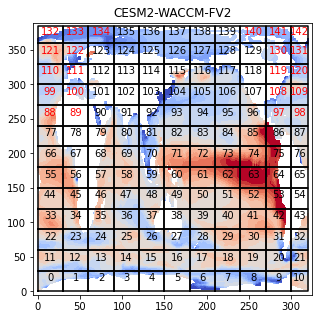

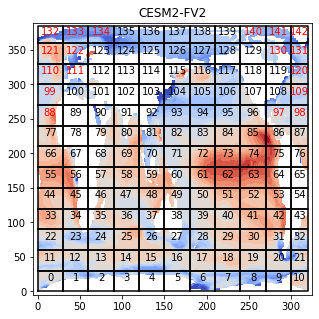

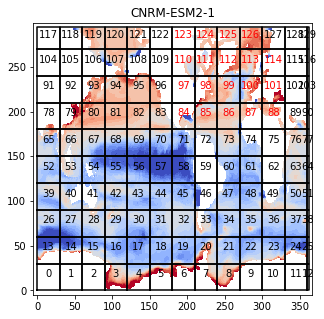

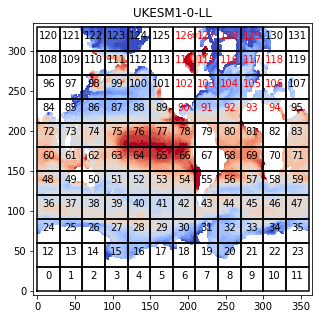

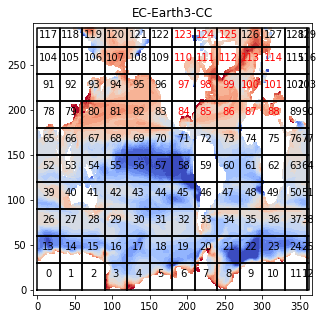

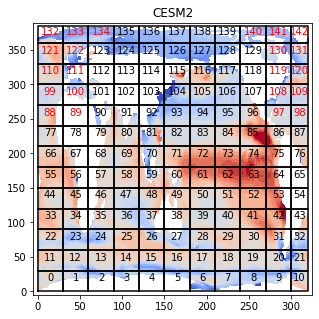

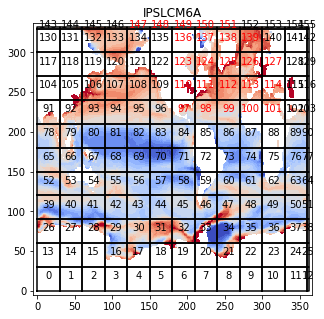

In [3]:
cmap = plt.get_cmap('coolwarm')
levels = np.linspace(-10, 10, 21)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

min_lon = -120
max_lon = 20
min_lat = 20
max_lat = 80
blocks_for_model = {}

for model in models:
    if (model == "GISS-E2-1-G") or (model == "GISS-E2-1-G-CC"):
        suffix = 'temp_re'
    else:
        suffix = 'temp'
    example_file = datadir + model + '/dpco2_' + suffix + '.nc'
    
    loaded = netCDF4.Dataset(example_file)
    dpco2 = loaded.variables['dpco2'][0, :, :]
    
    if model == "IPSLCM6A":
        nj = 332
        ni = 362
        lon = loaded.variables['nav_lon'][:]
        lat = loaded.variables['nav_lat'][:]
    elif model == "UKESM1-0-LL":
        nj = 330
        ni = 360
        lon = loaded.variables['longitude'][:]
        lat = loaded.variables['latitude'][:]
    elif model == "EC-Earth3-CC":
        nj = 292
        ni = 362
        lon = loaded.variables['longitude'][:]
        lat = loaded.variables['latitude'][:]
        lon[lon > 180] -= 360
    elif (model == "CESM2") or (model == "CESM2-FV2") or (model == "CESM2-WACCM") or (model == "CESM2-WACCM-FV2"):
        nj = 384
        ni = 320
        lon = loaded.variables['lon'][:]
        lat = loaded.variables['lat'][:]
        lon[lon > 180] -= 360
    elif model == "NorESM2-LM":
        nj = 385
        ni = 360
        lon = loaded.variables['longitude'][:]
        lat = loaded.variables['latitude'][:]
        lon[lon > 180] -= 360
    elif model == "CNRM-ESM2-1":
        nj = 294
        ni = 362
        lon = loaded.variables['lon'][:]
        lat = loaded.variables['lat'][:]
    elif model == "CMCC-ESM2":
        nj = 292
        ni = 362
        lon = loaded.variables['longitude'][:]
        lat = loaded.variables['latitude'][:]
        lon[lon > 180] -= 360
    elif (model == "GISS-E2-1-G") or (model == "GISS-E2-1-G-CC"):
        nj = 180
        ni = 360
        lon = loaded.variables['lon'][:]
        lat = loaded.variables['lat'][:]
        lon[lon > 180] -= 360
    
    print(model, dpco2.shape, lon.min(), lon.max())
    
    blocks_for_model[model] = []
    
    # =======================
    # Show the various block numbers/locations
    # =======================

    nblocks = np.int(np.ceil(362 / block_len) * np.ceil(332 / block_len))
    xlim = (-5, ni + 5)
    ylim = (-5, nj + 5)

    plt.figure(figsize=(5, 5))
    plt.title(model)
    plt.pcolormesh(dpco2, cmap=cmap, norm=norm)
    plt.xlim(xlim)
    plt.ylim(ylim)
    for block_number in range(0, nblocks):
        j0, j1, i0, i1 = get_ji_for_block(block_number, block_len)
        
        if (j0 >= nj):
            continue
        if (i0 >= ni):
            continue
            
        if (j1 - 1) > nj:
            j1 = nj
        if (i1 - 1) > ni:
            i1 = ni
        
        if lon.ndim == 2:
            lon_br = lon[j0, i1 - 1]
            lon_bl = lon[j0, i0]
            lat_tl = lat[j1 - 1, i0]
            lat_bl = lat[j0, i0]
        elif lon.ndim == 1:
            lon_br = lon[i1 - 1]
            lon_bl = lon[i0]
            lat_tl = lat[j1 - 1]
            lat_bl = lat[j0]
        
        if ((lon_bl > min_lon) and (lon_bl < max_lon)) and ((lat_tl > min_lat) and (lat_bl < max_lat)):
            blocks_for_model[model].append(block_number)
            color = 'red'
        else:
            color = 'k'
            
        plt.plot([i0, i1, i1, i0, i0], [j0, j0, j1, j1, j0], color = 'k')
        plt.text((i0 + i1) / 2., (j0 + j1) / 2., '{:d}'.format(block_number), ha='center', color=color)

In [4]:
for key, values in blocks_for_model.items():
    
    values_string = ""
    for value in values:
        values_string += (str(value) + " ")
    print(key, values_string)

GISS-E2-1-G 36 45 46 47 48 57 58 59 60 69 70 71 
GISS-E2-1-G-CC 36 45 46 47 48 57 58 59 60 69 70 71 
CMCC-ESM2 84 85 86 87 88 97 98 99 100 101 110 111 112 113 114 123 124 125 
NorESM2-LM 96 97 98 99 100 108 109 110 111 112 120 121 122 123 124 132 133 134 135 136 144 145 146 
CESM2-WACCM 88 89 97 98 99 100 108 109 110 111 119 120 121 122 130 131 132 133 134 140 141 142 
CESM2-WACCM-FV2 88 89 97 98 99 100 108 109 110 111 119 120 121 122 130 131 132 133 134 140 141 142 
CESM2-FV2 88 97 98 99 109 110 111 120 121 122 130 131 132 133 134 140 141 142 
CNRM-ESM2-1 84 85 86 87 88 97 98 99 100 101 110 111 112 113 114 123 124 125 126 
UKESM1-0-LL 90 91 92 93 94 102 103 104 105 106 114 115 116 117 118 126 127 128 129 
EC-Earth3-CC 84 85 86 87 88 97 98 99 100 101 110 111 112 113 114 123 124 125 
CESM2 88 89 97 98 99 100 108 109 110 111 119 120 121 122 130 131 132 133 134 140 141 142 
IPSLCM6A 97 98 99 100 101 110 111 112 113 114 123 124 125 126 127 136 137 138 139 147 148 149 150 151 
